# 1. Plot from resized dataset

In [74]:
# data path
dataset_path = '/home/yifan/Github/segmentation_train/dataset/cityscapes_all/'
mask_path = dataset_path + 'gtFine_256/'
mask_test_path = mask_path + 'train'

In [75]:
import os
import numpy as np
import imageio
import re
import matplotlib.pyplot as plt
masks = os.listdir(mask_test_path)
masks.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[^0-9]|[0-9]+', var)])

In [76]:
print(masks[0], masks[1], masks[2], masks[3])


cologne_000113_000019_gtFine_trainIds.npy cologne_000114_000019_gtFine_trainIds.npy cologne_000115_000019_gtFine_trainIds.npy cologne_000116_000019_gtFine_trainIds.npy


In [77]:
img = np.load(os.path.join(mask_test_path,masks[0]))
print(np.max(img))

19


## Run it

aachen_000016_000019_gtFine_trainIds.npy
(256, 256)
19
[ 0  1  2  5  6  7  8 10 11 12 13 15 17 18 19]


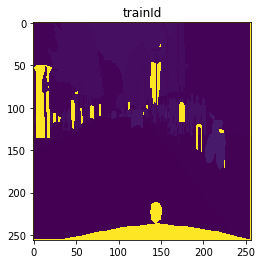

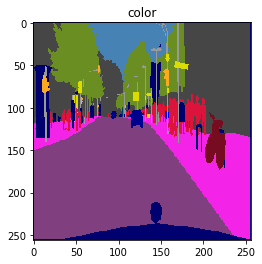

In [51]:
from dataGenerator import palette
def plot(i):
    print(masks[i])
    # img = plt.imread(os.path.join(mask_test_path, masks[i]))
    img = np.load(os.path.join(mask_test_path, masks[i]))
    print(np.max(img))
    print(np.unique(img))
#     trainId = np.argmax(img,axis=-1)
    trainId = img.astype(int)
    trainId = np.where(trainId==19, 255, trainId)
    color = palette(trainId).astype(int)

    fig = plt.figure()
    a = plt.figure(1)
    plt.title('trainId')
    plot1 = plt.imshow(trainId)
    b = plt.figure(2)
    plt.title('color')
    plot2 = plt.imshow(color)
plot(16)

# plot results

In [32]:
import numpy as np
import os
import re
import imageio
import matplotlib.pyplot as plt 
# data path
ckpt_name = 'cityscapes_getunet_softmax_Adam_100e/'
weights = 'weights.20-2.15-0.09-iou33.77-results_val'
# weights = None

if(weights==None):
    result_path = '/media/exfat/yifan/rf_results/' + ckpt_name
else:
    result_path = '/media/exfat/yifan/rf_results/' + ckpt_name + weights
masks = os.listdir(result_path)
masks.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[^0-9]|[0-9]+', var)])
print(masks[0:10]) # 5*i + ?

['frankfurt_000000_000294_A.jpg', 'frankfurt_000000_000294_B_color_gt.jpg', 'frankfurt_000000_000294_B_color_pred.jpg', 'frankfurt_000000_000294_B_trainId_gt.npy', 'frankfurt_000000_000294_B_trainId_pred.npy', 'frankfurt_000000_000576_A.jpg', 'frankfurt_000000_000576_B_color_gt.jpg', 'frankfurt_000000_000576_B_color_pred.jpg', 'frankfurt_000000_000576_B_trainId_gt.npy', 'frankfurt_000000_000576_B_trainId_pred.npy']


In [33]:
from PIL import Image
def plot_result(i):
    print(masks[5*i+3],masks[5*i+4])
    color_gt = np.array(Image.open(os.path.join(result_path, masks[5*i+1])))
    print(color_gt.shape)
    color_pred = np.array(Image.open(os.path.join(result_path, masks[5*i+2])))
    
    fig = plt.figure()
    a = plt.figure(1)
    plt.title('color_gt')
    plot1 = plt.imshow(color_gt)
    b = plt.figure(2)
    plt.title('color_pred')
    plot2 = plt.imshow(color_pred)


In [3]:
from PIL import Image
import sys
sys.path.append("/home/yifan/Github/segmentation_train")
from dataGenerator import palette
def plot_result_train(i):
    print(masks[5*i+3],masks[5*i+4])
    color_gt = np.load(os.path.join(result_path, masks[5*i+3]))
    print(np.unique(color_gt))
    color_gt = palette(color_gt)
    color_pred = np.load(os.path.join(result_path, masks[5*i+4]))
    print(np.unique(color_pred))
    
    color_pred = palette(color_pred)
    fig = plt.figure()
    a = plt.figure(1)
    plt.title('color_gt')
    plot1 = plt.imshow(color_gt)
    b = plt.figure(2)
    plt.title('color_pred')
    plot2 = plt.imshow(color_pred)


Using TensorFlow backend.


KeyboardInterrupt: 

frankfurt_000001_062016_B_trainId_gt.npy frankfurt_000001_062016_B_trainId_pred.npy
(256, 256, 3)


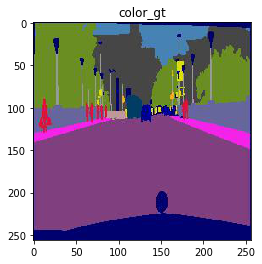

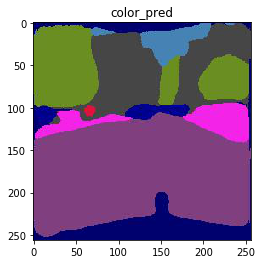

In [36]:
plot_result(213)

aachen_000025_000019_B_trainId_gt.npy aachen_000025_000019_B_trainId_pred.npy
[  0   1   2   5   6   7   8   9  10  11  13 255]
[  0   2   3   4   8   9  10  13 255]


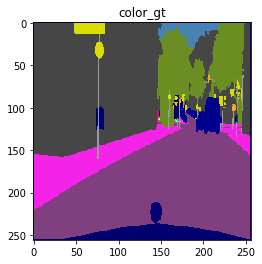

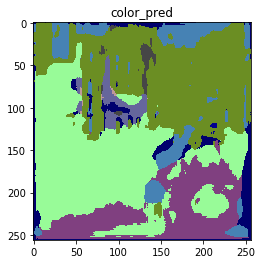

In [30]:
plot_result_train(25)

31.25